In [927]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import Error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set()
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
myqo=pd.read_csv("/Users/aa085/Lets begin/Plo.csv")
myqo

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,Foreign percentage,Domestic Money,international,wordlwide,DomesticOpening,Budget,Date,MPAA,genres,linkselection
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0000000000,2009,7.9000000000,81.0000000000,82.0000000000,...,73.1000000000,785221649,2138484377,2923706026,77025481.0000000000,237000000.0000000000,"December 16, 2009 (EMEA, LATAM)",PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0000000000,2019,8.4000000000,94.0000000000,90.0000000000,...,69.3000000000,858373000,1941066100,2799439100,357115007.0000000000,356000000.0000000000,"April 24, 2019 (21 markets)",PG-13,Action Adventure Drama ...,https://watch.plex.tv/movie/avengers-endgame
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0000000000,2022,7.6000000000,76.0000000000,92.0000000000,...,70.5000000000,684075767,1636174514,2320250281,134100226.0000000000,NaN,"December 14, 2022 (APAC, EMEA)",PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar-2
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0000000000,1997,6.1000000000,60.0000000000,57.0000000000,...,70.2000000000,674292608,1590450697,2264743305,28638131.0000000000,200000000.0000000000,"December 19, 1997 (Domestic)",PG-13,Drama Romance,https://watch.plex.tv/movie/titanic
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0000000000,2015,7.8000000000,93.0000000000,85.0000000000,...,54.8000000000,936662225,1134647993,2071310218,247966675.0000000000,245000000.0000000000,"December 16, 2015 (APAC, EMEA)",PG-13,Action Adventure Sci-Fi,https://watch.plex.tv/movie/star-wars-episode-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0000000000,2002,5.5000000000,41.0000000000,38.0000000000,...,49.6000000000,91047077,89583830,180630907,36075875.0000000000,60000000.0000000000,"April 18, 2002 (APAC)",PG-13,Action Adventure Fantasy,https://watch.plex.tv/movie/the-scorpion-king
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0000000000,2002,6.2000000000,38.0000000000,78.0000000000,...,29.6000000000,127223418,53399006,180622424,35648740.0000000000,30000000.0000000000,"September 27, 2002 (Domestic)",PG-13,Comedy Romance,https://watch.plex.tv/movie/sweet-home-alabama
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0000000000,2017,6.0000000000,21.0000000000,51.0000000000,...,42.4000000000,104029443,76584381,180613824,29651193.0000000000,69000000.0000000000,"November 9, 2017 (Netherlands)",PG-13,Comedy,https://watch.plex.tv/movie/daddys-home-2
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0000000000,2016,8.1000000000,84.0000000000,91.0000000000,...,62.8000000000,67209615,113354021,180563636,15190758.0000000000,40000000.0000000000,"November 3, 2016 (EMEA, APAC)",R,Biography Drama History ...,https://watch.plex.tv/movie/hacksaw-ridge


# Preperation for Infenertial Statistics.

In [400]:
df=myqo.copy()
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Director', 'distributor', 'Time', 'Year',
       'IMDB', 'Tomatometer', 'Rotten Tomatos Audience', 'TMDB',
       'Domestic Percentage', 'Foreign percentage', 'Domestic Money',
       'international', 'wordlwide', 'DomesticOpening', 'Budget', 'Date',
       'MPAA', 'linkselection', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Mpaa', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Unknown', 'War', 'Western'],
      dtype='object')

In [426]:
#Moving on SQL to filter/join tables 
df1=df[df["Adventure"]==1]
columns_to_keep = ['Name','wordlwide', 'Fantasy']  
df1 = df1[columns_to_keep]

df2=df[df["Fantasy"]==1]
columns_to_keep = ['Name','wordlwide', 'Fantasy']  
df2 = df2[columns_to_keep]

df1.to_csv("Ad1.csv")
df2.to_csv("Ad2.csv")

In [428]:
#Now We can access our Dataframe with all films includes both Adventure & Fantasy genres
df5=pd.read_csv("/Users/aa085/Lets begin/Ad5.csv")
df5 = df5.drop(0, axis=0)
df5

,Name,Worldwide,Adventure,Fantasy
1,Avatar: The Way of Water,2320250000,1,1
2,Spider-Man: No Way Home,1921850000,1,1
3,Frozen II,1453680000,1,1
4,Barbie,1439940000,1,1
5,The Super Mario Bros. Movie,1361960000,1,1
...,...,...,...,...
249,Hop,184367000,1,1
250,Storks,183801000,1,1
251,Mirror Mirror,183019000,1,1
252,Scooby-Doo 2: Monsters Unleashed,181239000,1,1


# Confidence Intervals

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/4274564423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5["Worldwide"])


<Axes: xlabel='Worldwide', ylabel='Density'>

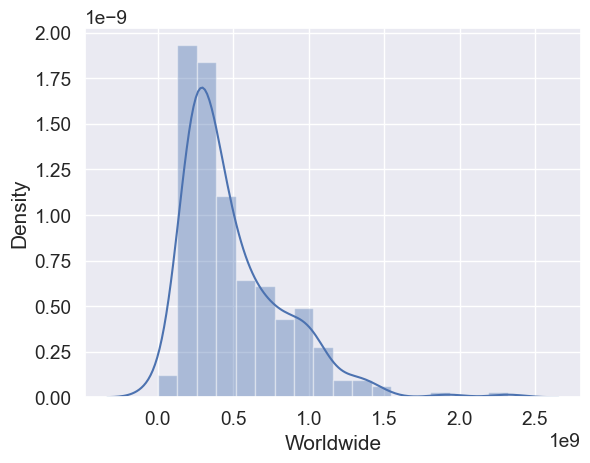

In [429]:
sns.distplot(df5["Worldwide"])

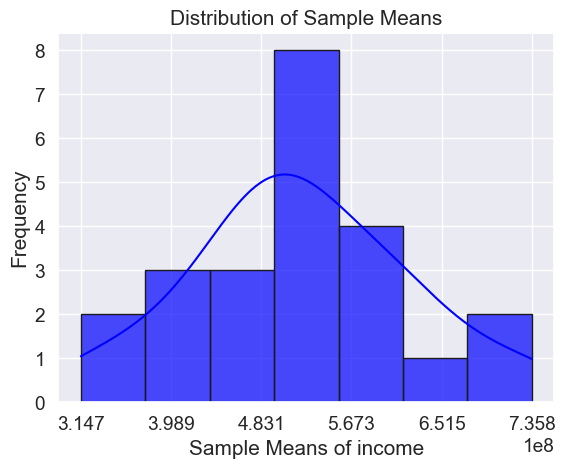

In [460]:
#Implementing clt for getting normal distribution
profit=df5["Worldwide"]
num_samples = 23
sample_size = len(profit) // num_samples
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(profit, sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean) 
sns.histplot(sample_means,bins=7, kde=True,edgecolor='k',color='blue', alpha=0.7)
plt.xlabel('Sample Means of income')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
x_ticks = np.linspace(min(sample_means), max(sample_means),6)  
plt.xticks(x_ticks)
plt.show()

In [461]:
shapiro_stat, shapiro_pvalue = stats.shapiro(sample_means)
if shapiro_pvalue < 0.05:
    print("The sample means do not follow a normal distribution.")
else:
    print("The sample means follow a normal distribution.")

The sample means may follow a normal distribution.


In [466]:
len(sample_means)-1 #degrees of freedom

22

In [469]:
Interval1=np.mean(sample_means)-2.0739*(np.std(sample_means)/np.sqrt(len(sample_means)))
Interval1

476767748.396494

In [470]:
Interval2=np.mean(sample_means)+2.0739*(np.std(sample_means)/np.sqrt(len(sample_means)))
Interval2

563648658.1647707

# With a 95% confidence level, it is expected that movies falling within the Adventure and Fantasy genres will likely yield Gross Income falling within the range of 476767748.4 to 563648658.2.

# Hypothesis Testing 

In [198]:
corr=output["Tomatometer"].corr(output["Rotten Tomatos Audience"])
corr

0.7310836328450963

In [199]:
corr=output["wordlwide"].corr(output["IMDB"])
corr

0.20612476734800625

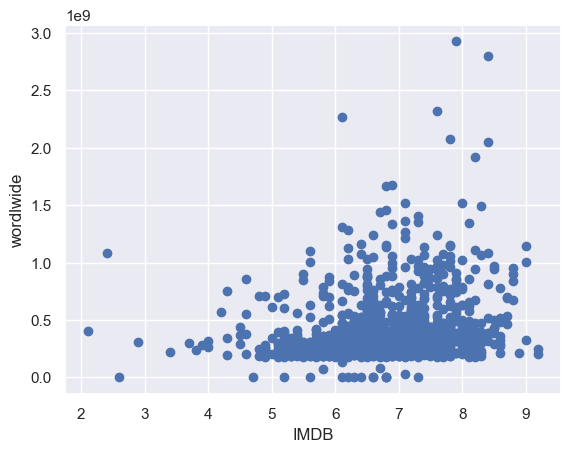

In [207]:
plt.scatter(output["IMDB"], output["wordlwide"])
plt.xlabel("IMDB")  
plt.ylabel("wordlwide")
plt.show()

In [208]:
"We also can observe some kind of relationship between variables. But it is not so strong as its corellation coefficient is only 0.2.It means it is so likely that there are also some values have very good Imdb but didn't make as much as profit as other movies which has less imdb rating."

"We also can observe some kind of relationship between variables. But it is not so strong as its corellation coefficient is only 0.2.It means it is so likely that there are also some values have very good Imdb but didn't make as much as profit as other movies which has less imdb rating."

In [201]:
output[['wordlwide', 'IMDB']].describe()

,wordlwide,IMDB
count,1.000000e+03,1000.000000
mean,4.176985e+08,6.782700
std,3.090752e+08,0.955669
min,4.900000e+01,2.100000
25%,2.264065e+08,6.200000
50%,3.150009e+08,6.800000
75%,4.841999e+08,7.400000
max,2.923706e+09,9.200000


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_38734/2621387668.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(output["IMDB"])


<Axes: xlabel='IMDB', ylabel='Density'>

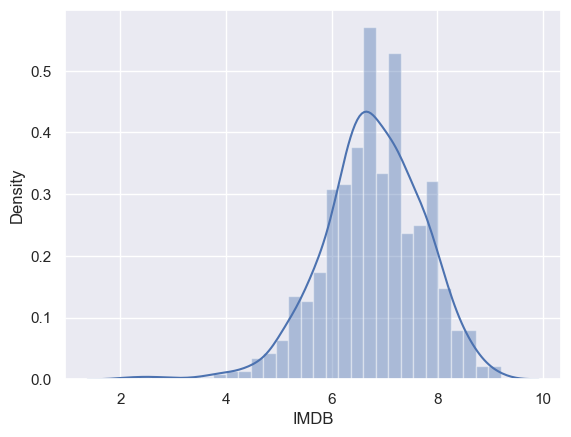

In [206]:
sns.distplot(output["IMDB"])

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_38734/4197834916.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(output['IMDB']).set_title('IMDB Ratings Distribution')
/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_38734/4197834916.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



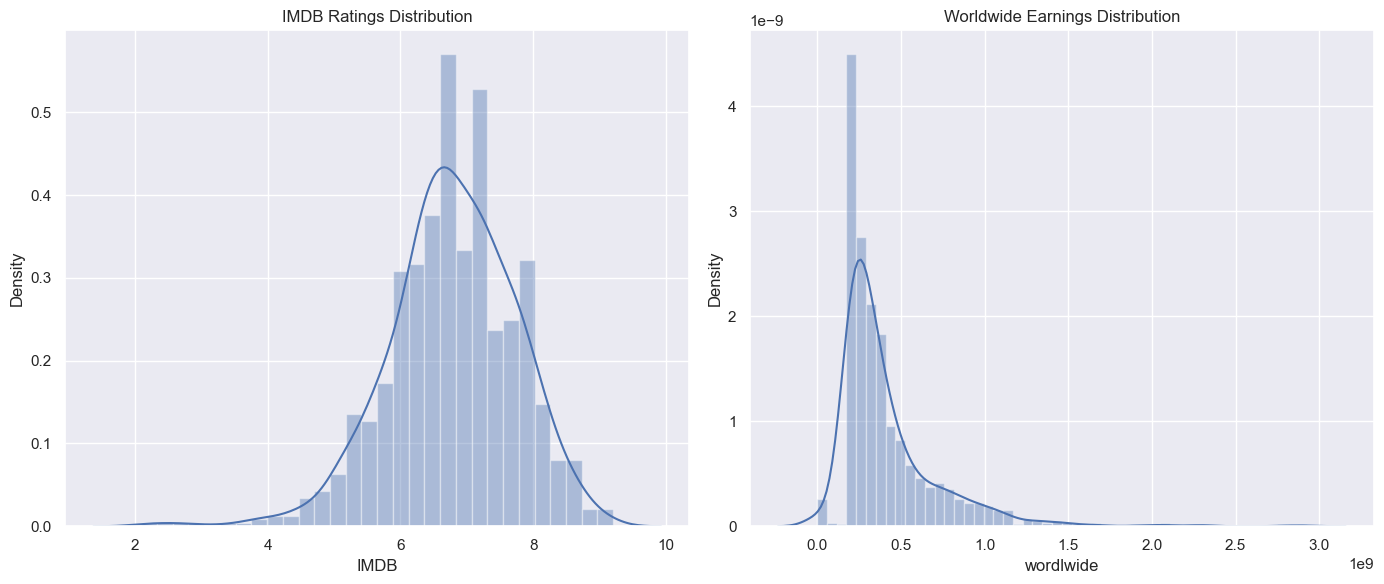

In [211]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  
sns.distplot(output['IMDB']).set_title('IMDB Ratings Distribution')
plt.subplot(1, 2, 2)  
sns.distplot(output['wordlwide']).set_title('Worldwide Earnings Distribution')
plt.tight_layout()
plt.show()

In [205]:
shapiro_stat, shapiro_pvalue = stats.shapiro(output['wordlwide'])
if shapiro_pvalue < 0.05:
    print("The sample means do not follow a normal distribution.")
else:
    print("The sample means follow a normal distribution.")

The sample means do not follow a normal distribution.


In [197]:
""""NULL HYPOTHESIS , THERE IS NO RELATIONSHIP rho=0, Alternative hypothesis , THERE IS A RELATIONSHIP rho!=0"""

'"NULL HYPOTHESIS , THERE IS NO RELATIONSHIP rho=0, Alternative hypothesis , THERE IS A RELATIONSHIP rho!=0'

In [189]:
spearman_corr, spearman_p_value = stats.spearmanr(output['wordlwide'], output['IMDB'])
spearman_corr, spearman_p_value

(0.21925719740733987, 2.3776950612507568e-12)

In [209]:
"""For making sure p-value is correct,  we can calculate t-statistic by ourselves and finding p-value by using t-table."""

'For making sure p-value is correct,  we can calculate t-statistic by ourselves and finding p-value by using t-table.'

In [191]:
n = len(output['wordlwide'])  
rho = spearman_corr  

t_statistic = rho * (np.sqrt((n - 2) / (1 - rho**2)))
t_statistic

7.09933174106636

In [195]:
'''When you look at t-table , You will observe p-value is extremely low and almost impossible to find from table. But with the help of softwate we know the exact number'''

'When you look at t-table , You will observe p-value is extremely low and almost impossible to find from table. But with the help of softwate we know the exact number'

In [212]:
alpha=0.05
spearman_p_value>alpha

False

In [213]:
""" The result indicates that we need to reject null hypothesis at 95% signifance level . It means there is a correlation between the worldwide earnings and IMDB ratings of movies. However, the correlation coefficient of 0.219 suggests that while the correlation is statistically significant, it is weak in strength."""

' The result indicates that we need to reject null hypothesis at 95% signifance level . It means there is a correlation between the worldwide earnings and IMDB ratings of movies. However, the correlation coefficient of 0.219 suggests that while the correlation is statistically significant, it is weak in strength.'

# Analysing data to understand patterns. 

In [2971]:
df.to_csv("Plo.csv")

In [488]:
df=pd.read_csv("/Users/aa085/Lets begin/Readytogo.csv")
df

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0000000000,2009,7.9000000000,81.0000000000,82.0000000000,...,0,0,0,0,1,0,0,0,0,0
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0000000000,2019,8.4000000000,94.0000000000,90.0000000000,...,0,0,0,0,1,0,0,0,0,0
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0000000000,2022,7.6000000000,76.0000000000,92.0000000000,...,0,0,0,0,1,0,0,0,0,0
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0000000000,1997,6.1000000000,60.0000000000,57.0000000000,...,0,0,0,1,0,0,0,0,0,0
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0000000000,2015,7.8000000000,93.0000000000,85.0000000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0000000000,2002,5.5000000000,41.0000000000,38.0000000000,...,0,0,0,0,0,0,0,0,0,0
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0000000000,2002,6.2000000000,38.0000000000,78.0000000000,...,0,0,0,1,0,0,0,0,0,0
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0000000000,2017,6.0000000000,21.0000000000,51.0000000000,...,0,0,0,0,0,0,0,0,0,0
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0000000000,2016,8.1000000000,84.0000000000,91.0000000000,...,0,0,0,0,0,0,0,0,1,0


In [489]:
df.describe()

,Unnamed: 0,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,TMDB,Domestic Percentage,Foreign percentage,Domestic Money,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western
count,1000.0000000000,937.0000000000,1000.0000000000,1000.0000000000,923.0000000000,923.0000000000,923.0000000000,967.0000000000,999.0000000000,1000.0000000000,...,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000
mean,499.5000000000,118.3810032017,2008.1390000000,6.7827000000,64.4355362947,69.9263271939,68.4117009751,40.2762150982,61.0517517518,164677253.8370000124,...,0.0320000000,0.0560000000,0.1040000000,0.1490000000,0.2640000000,0.0190000000,0.2720000000,0.0040000000,0.0340000000,0.0130000000
std,288.8194360957,21.5525838243,10.6142518032,0.9556694062,24.0336648023,17.5070171940,7.3020926509,14.3818090525,15.8485244072,119758047.3792100698,...,0.1760880661,0.2300367730,0.3054132893,0.3562666500,0.4410198391,0.1365930366,0.4452125495,0.0631505185,0.1813198193,0.1133306836
min,0.0000000000,72.0000000000,1937.0000000000,2.1000000000,5.0000000000,14.0000000000,40.0000000000,0.2000000000,13.2000000000,6752.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,249.7500000000,102.0000000000,2002.0000000000,6.2000000000,46.0000000000,57.0000000000,63.0000000000,31.8000000000,51.0000000000,95857798.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
50%,499.5000000000,116.0000000000,2010.0000000000,6.8000000000,69.0000000000,72.0000000000,68.0000000000,40.0000000000,60.4000000000,134916907.5000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
75%,749.2500000000,131.0000000000,2016.0000000000,7.4000000000,85.0000000000,85.0000000000,73.5000000000,49.2500000000,69.2000000000,198399283.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000
max,999.0000000000,201.0000000000,2023.0000000000,9.2000000000,100.0000000000,100.0000000000,87.0000000000,100.0000000000,100.0000000000,936662225.0000000000,...,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000


In [639]:
df2=pd.read_csv("/Users/aa085/Lets begin/Readytogo3.csv") #Contains Dummy for Actors , Which creatd in our Scraping file

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,Domestic Money,international,wordlwide,DomesticOpening,Budget,Date,MPAA,linkselection,Genre,BestActorPresent
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0000000000,2009,7.9000000000,81.0000000000,82.0000000000,...,785221649,2138484377,2923706026,77025481.0000000000,237000000.0000000000,"December 16, 2009 (EMEA, LATAM)",PG-13,https://watch.plex.tv/movie/avatar,1,0
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0000000000,2019,8.4000000000,94.0000000000,90.0000000000,...,858373000,1941066100,2799439100,357115007.0000000000,356000000.0000000000,"April 24, 2019 (21 markets)",PG-13,https://watch.plex.tv/movie/avengers-endgame,1,1
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0000000000,2022,7.6000000000,76.0000000000,92.0000000000,...,684075767,1636174514,2320250281,134100226.0000000000,NaN,"December 14, 2022 (APAC, EMEA)",PG-13,https://watch.plex.tv/movie/avatar-2,1,0
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0000000000,1997,6.1000000000,60.0000000000,57.0000000000,...,674292608,1590450697,2264743305,28638131.0000000000,200000000.0000000000,"December 19, 1997 (Domestic)",PG-13,https://watch.plex.tv/movie/titanic,0,1
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0000000000,2015,7.8000000000,93.0000000000,85.0000000000,...,936662225,1134647993,2071310218,247966675.0000000000,245000000.0000000000,"December 16, 2015 (APAC, EMEA)",PG-13,https://watch.plex.tv/movie/star-wars-episode-...,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0000000000,2002,5.5000000000,41.0000000000,38.0000000000,...,91047077,89583830,180630907,36075875.0000000000,60000000.0000000000,"April 18, 2002 (APAC)",PG-13,https://watch.plex.tv/movie/the-scorpion-king,1,1
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0000000000,2002,6.2000000000,38.0000000000,78.0000000000,...,127223418,53399006,180622424,35648740.0000000000,30000000.0000000000,"September 27, 2002 (Domestic)",PG-13,https://watch.plex.tv/movie/sweet-home-alabama,0,0
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0000000000,2017,6.0000000000,21.0000000000,51.0000000000,...,104029443,76584381,180613824,29651193.0000000000,69000000.0000000000,"November 9, 2017 (Netherlands)",PG-13,https://watch.plex.tv/movie/daddys-home-2,0,1
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0000000000,2016,8.1000000000,84.0000000000,91.0000000000,...,67209615,113354021,180563636,15190758.0000000000,40000000.0000000000,"November 3, 2016 (EMEA, APAC)",R,https://watch.plex.tv/movie/hacksaw-ridge,0,0


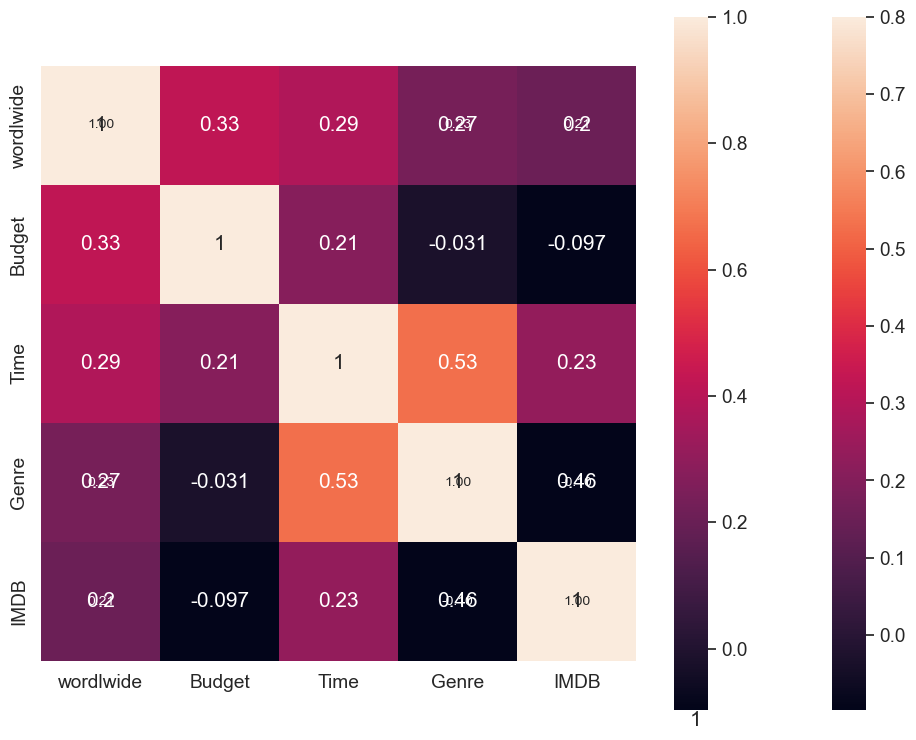

In [3786]:
#Analysing corelattions between most important values
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'wordlwide')['wordlwide'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Testing different ways and analysing data to bring out the best model from it. 

In [643]:
df2.groupby("BestActorPresent").sum()["wordlwide"][0]/df2.groupby("BestActorPresent").sum()["wordlwide"][1]

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/229669580.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby("BestActorPresent").sum()["wordlwide"][0]/df2.groupby("BestActorPresent").sum()["wordlwide"][1]
/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/229669580.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby("BestActorPresent").sum()["wordlwide"][0]/df2.groupby("BestActorPresent").sum()["wordlwide"][1]


0.6907760614252545

In [382]:
#We got unique values from genres column
Unq=[]
for a in range(1000):
    Unq.append(myqo["genres"].str.split(",")[a])
flat_data = [item for sublist in Unq for item in sublist]
flat_data=list(set(flat_data))
flat_data

['Comedy',
 'Music',
 'Fantasy',
 'War',
 'Documentary',
 'Thriller',
 'Romance',
 'Sci-Fi',
 'Crime',
 'Action',
 'Sport',
 'Animation',
 'Drama',
 'Family',
 'Mystery',
 'Biography',
 'Mpaa',
 'Unknown',
 'Horror',
 'Western',
 'History',
 'Musical',
 'Adventure']

In [3792]:
""" We have dummies for both genres & actors , Will split Actor dummy into diferent parts as this method going to contribute models better"""

' We have dummies for both genres & actors , Will split Actor dummy into diferent parts as this method going to contribute models better'

In [3698]:
output=pd.read_csv("/Users/aa085/Lets begin/Readytogo.csv")
output

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,TMDB,Domestic Percentage,Foreign percentage,Domestic Money,international,wordlwide,DomesticOpening,Budget,Date,MPAA,genres,linkselection,Actors,BestActorPresent,Fouractors,NOactor,OneActor,Threeactors,Twoactors,Genre Cluster
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0000000000,2009,7.9000000000,81.0000000000,82.0000000000,76.0000000000,26.9000000000,73.1000000000,785221649,2138484377,2923706026,77025481.0000000000,237000000.0000000000,"December 16, 2009 (EMEA, LATAM)",PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar,"SamWorthington,ZoeSaldana,SigourneyWeaver,Mich...",0,0,1,0,0,0,1
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0000000000,2019,8.4000000000,94.0000000000,90.0000000000,83.0000000000,30.7000000000,69.3000000000,858373000,1941066100,2799439100,357115007.0000000000,356000000.0000000000,"April 24, 2019 (21 markets)",PG-13,Action Adventure Drama ...,https://watch.plex.tv/movie/avengers-endgame,"RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",3,0,0,0,0,1,1
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0000000000,2022,7.6000000000,76.0000000000,92.0000000000,77.0000000000,29.5000000000,70.5000000000,684075767,1636174514,2320250281,134100226.0000000000,NaN,"December 14, 2022 (APAC, EMEA)",PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar-2,"SamWorthington,ZoeSaldana,SigourneyWeaver,Step...",0,0,1,0,0,0,1
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0000000000,1997,6.1000000000,60.0000000000,57.0000000000,62.0000000000,29.8000000000,70.2000000000,674292608,1590450697,2264743305,28638131.0000000000,200000000.0000000000,"December 19, 1997 (Domestic)",PG-13,Drama Romance,https://watch.plex.tv/movie/titanic,"LeonardoDiCaprio,KateWinslet,BillyZane,KathyBates",2,0,0,1,0,0,0
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0000000000,2015,7.8000000000,93.0000000000,85.0000000000,73.0000000000,45.2000000000,54.8000000000,936662225,1134647993,2071310218,247966675.0000000000,245000000.0000000000,"December 16, 2015 (APAC, EMEA)",PG-13,Action Adventure Sci-Fi,https://watch.plex.tv/movie/star-wars-episode-...,"DaisyRidley,JohnBoyega,OscarIsaac,DomhnallGleeson",0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0000000000,2002,5.5000000000,41.0000000000,38.0000000000,56.0000000000,50.4000000000,49.6000000000,91047077,89583830,180630907,36075875.0000000000,60000000.0000000000,"April 18, 2002 (APAC)",PG-13,Action Adventure Fantasy,https://watch.plex.tv/movie/the-scorpion-king,"DwayneJohnson,StevenBrand,MichaelClarkeDuncan,...",2,0,0,1,0,0,1
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0000000000,2002,6.2000000000,38.0000000000,78.0000000000,64.0000000000,70.4000000000,29.6000000000,127223418,53399006,180622424,35648740.0000000000,30000000.0000000000,"September 27, 2002 (Domestic)",PG-13,Comedy Romance,https://watch.plex.tv/movie/sweet-home-alabama,"ReeseWitherspoon,PatrickDempsey,JoshLucas,Cand...",0,0,1,0,0,0,0
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0000000000,2017,6.0000000000,21.0000000000,51.0000000000,63.0000000000,57.6000000000,42.4000000000,104029443,76584381,180613824,29651193.0000000000,69000000.0000000000,"November 9, 2017 (Netherlands)",PG-13,Comedy,https://watch.plex.tv/movie/daddys-home-2,"WillFerrell,MarkWahlberg,MelGibson,JohnLithgow",2,0,0,1,0,0,0
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0000000000,2016,8.1000000000,84.0000000000,91.0000000000,82.0000000000,37.2000000000,62.8000000000,67209615,113354021,180563636,15190758.0000000000,40000000.0000

In [3699]:
Lastversion=output.copy()
output.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Director', 'distributor', 'Time', 'Year',
       'IMDB', 'Tomatometer', 'Rotten Tomatos Audience', 'TMDB',
       'Domestic Percentage', 'Foreign percentage', 'Domestic Money',
       'international', 'wordlwide', 'DomesticOpening', 'Budget', 'Date',
       'MPAA', 'genres', 'linkselection', 'Actors', 'BestActorPresent',
       'Fouractors', 'NOactor', 'OneActor', 'Threeactors', 'Twoactors',
       'Genre Cluster'],
      dtype='object')

# Clustering

In [3493]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Director', 'distributor', 'Time', 'Year',
       'IMDB', 'Tomatometer', 'Rotten Tomatos Audience', 'TMDB',
       'Domestic Percentage', 'Foreign percentage', 'Domestic Money',
       'international', 'wordlwide', 'DomesticOpening', 'Budget', 'Date',
       'MPAA', 'linkselection', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Mpaa', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Unknown', 'War', 'Western'],
      dtype='object')

In [3494]:
df.columns
columns_to_drop = [
    'Unknown', 'Budget', 'MPAA', 'Date', 'DomesticOpening', 'international',
    'Domestic Money', 'Foreign percentage', 'Domestic Percentage', 'TMDB',
    'Rotten Tomatos Audience', 'Tomatometer', 'IMDB', 'Year', 'Time', 'distributor',
    'Director', 'Name', 'ID', 'Unnamed: 0', 'linkselection', 'Mpaa','Biography','Documentary','Sport','Western','Music', 'Musical'
    ,'War'
]

In [3495]:
x=df.drop(columns=columns_to_drop)

In [3496]:
x.columns

Index(['wordlwide', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller'],
      dtype='object')

In [3497]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


array([[ 8.1121403 ,  1.02840321,  0.94358845, ..., -0.41843534,
         1.66969422, -0.61124985],
       [ 7.70987864,  1.02840321,  0.94358845, ..., -0.41843534,
         1.66969422, -0.61124985],
       [ 6.15870733,  1.02840321,  0.94358845, ..., -0.41843534,
         1.66969422, -0.61124985],
       ...,
       [-0.76746156, -0.97238125, -1.05978406, ..., -0.41843534,
        -0.59891206, -0.61124985],
       [-0.76762402, -0.97238125, -1.05978406, ..., -0.41843534,
        -0.59891206, -0.61124985],
       [-0.76764372,  1.02840321, -1.05978406, ..., -0.41843534,
         1.66969422,  1.63599223]])

In [3498]:
wcss =[]

for i in range(1,8):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aa085/anacond

[15000.0,
 12633.181524691816,
 10982.907582101514,
 9827.653393215234,
 8847.121829158357,
 8301.874122376375,
 7383.560138470535]

Text(0, 0.5, 'WCSS')

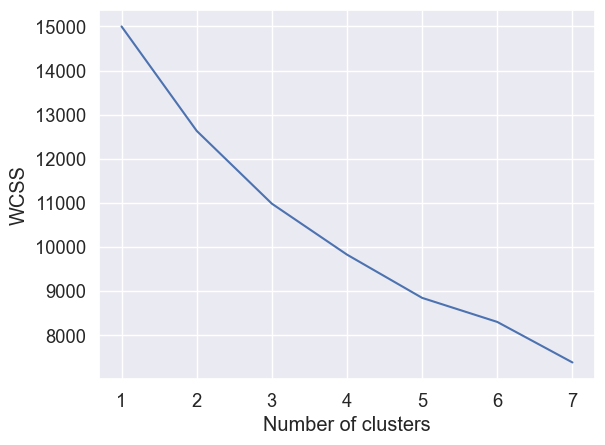

In [3499]:
plt.plot(range(1,8),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [3634]:
kmeans_new = KMeans(6)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3706]:
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 3, 4, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 3, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 3, 1, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 3, 1, 1, 2, 2, 2, 2, 1, 1, 1, 6, 1, 2, 5, 2,
       2, 2, 2, 2, 0, 5, 1, 2, 1, 2, 2, 4, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 4, 1, 1, 1, 3, 1,
       1, 1, 4, 1, 3, 1, 4, 4, 2, 1, 1, 2, 1, 4, 2, 1, 2, 2, 1, 2, 2, 3,
       1, 0, 0, 4, 1, 1, 3, 6, 1, 1, 4, 4, 0, 1, 1, 2, 4, 4, 0, 1, 4, 1,
       2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 5, 3, 1, 2, 1, 2, 4,
       1, 4, 0, 0, 1, 1, 2, 1, 2, 4, 1, 2, 0, 1, 6, 2, 4, 2, 0, 2, 1, 4,
       2, 2, 1, 2, 0, 1, 1, 0, 4, 4, 4, 1, 4, 2, 2, 2, 6, 2, 1, 2, 4, 6,
       2, 2, 2, 5, 2, 1, 2, 4, 0, 2, 2, 1, 1, 4, 0, 2, 4, 2, 0, 2, 2, 4,
       2, 2, 1, 2, 4, 2, 3, 4, 1, 0, 5, 2, 0, 4, 2, 0, 4, 1, 2, 1, 2, 4,
       1, 6, 0, 2, 4, 0, 4, 2, 1, 1, 1, 0, 2, 5, 1, 1, 4, 4, 4, 4, 4, 4,
       3, 5, 1, 1, 5, 2, 1, 4, 4, 2, 0, 6, 0, 1, 1,

In [3707]:
kmeans.inertia_ #Must indicate balance between clustering and meanings from clusters

7383.560138470535

In [3708]:
clusters_new

,wordlwide,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Mystery,Romance,Sci-Fi,Thriller,cluster_pred
0,2923706026,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,2799439100,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1
2,2320250281,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1
3,2264743305,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,2071310218,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,180630907,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
996,180622424,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
997,180613824,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
998,180563636,0,0,0,0,0,1,0,0,1,0,0,0,0,0,5


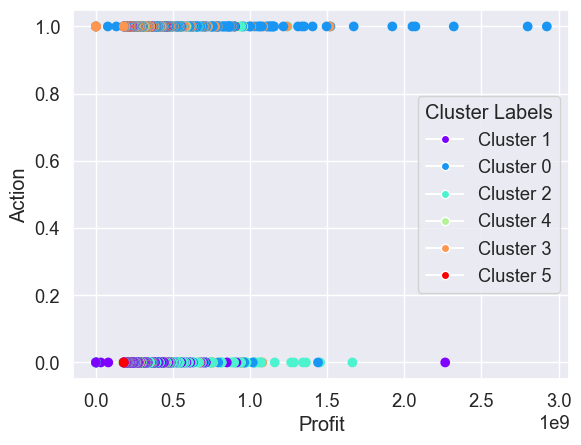

In [3709]:
scatter = plt.scatter(clusters_new['wordlwide'],clusters_new['Action'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Profit')
plt.ylabel('Action')
cluster_labels = clusters_new['cluster_pred'].unique()
colors = [scatter.cmap(i / (len(cluster_labels) - 1)) for i in range(len(cluster_labels))]
legend_labels = [f'Cluster {label}' for label in cluster_labels]
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color) for label, color in zip(legend_labels, colors)], title='Cluster Labels')
plt.show()

In [3710]:
for i in range(6):
    print(np.mean(clusters_new[clusters_new["cluster_pred"]==i]["wordlwide"]))

297340121.6532258
594692986.9699571
467668830.91150445
290821365.31578946
353932570.8405797
340024130.8965517


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/2322825048.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clusters_new[clusters_new["cluster_pred"] == cluster]["wordlwide"], ax=ax)
/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/2322825048.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

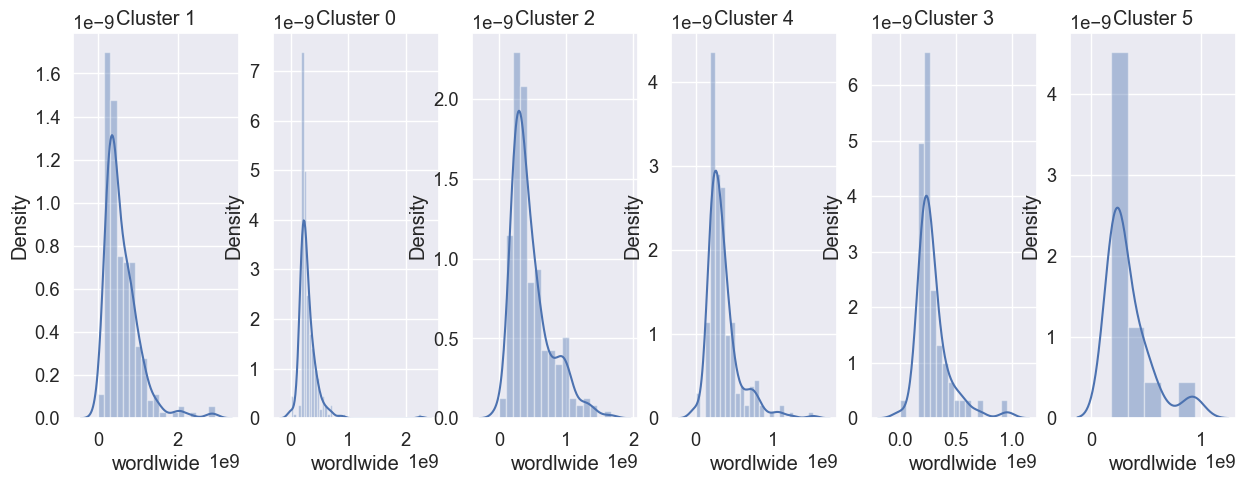

In [3711]:
cluster_values = clusters_new["cluster_pred"].unique()

# Create subplots for each cluster
fig, axes = plt.subplots(1, len(cluster_values), figsize=(15, 5))

# Loop through the clusters and create distribution plots
for i, cluster in enumerate(cluster_values):
    ax = axes[i]
    sns.distplot(clusters_new[clusters_new["cluster_pred"] == cluster]["wordlwide"], ax=ax)
    ax.set_title(f'Cluster {cluster}')
    
plt.show()

In [3796]:
for a in flat_data:
    try:
        if clusters_new[clusters_new["cluster_pred"]==2][a].value_counts()[1]>0.5* len(clusters_new[clusters_new["cluster_pred"]==2][a]):
             print(clusters_new[clusters_new["cluster_pred"]==2][a].value_counts())
    except KeyError:
        pass

1    171
0     55
Name: Comedy, dtype: int64
1    162
0     64
Name: Fantasy, dtype: int64
1    143
0     83
Name: Animation, dtype: int64
1    221
0      5
Name: Family, dtype: int64
1    217
0      9
Name: Adventure, dtype: int64


In [3795]:
for a in flat_data:
    try:
        if clusters_new[clusters_new["cluster_pred"]==5][a].value_counts()[1]>0.5* len(clusters_new[clusters_new["cluster_pred"]==5][a]):
             print(clusters_new[clusters_new["cluster_pred"]==5][a].value_counts())
    except KeyError:
        pass

1    29
Name: Drama, dtype: int64
1    29
Name: History, dtype: int64


In [ ]:
output["Genre Cluster"]=clusters_new["cluster_pred"]
output

# Let's start actual Modelling
# Analysing & Transforming data for better results

In [2526]:
pd.reset_option('^display.', silent=True)

In [83]:
data0=output.copy() 

In [3713]:
data0.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Director', 'distributor', 'Time', 'Year',
       'IMDB', 'Tomatometer', 'Rotten Tomatos Audience', 'TMDB',
       'Domestic Percentage', 'Foreign percentage', 'Domestic Money',
       'international', 'wordlwide', 'DomesticOpening', 'Budget', 'Date',
       'MPAA', 'genres', 'linkselection', 'Actors', 'BestActorPresent',
       'Fouractors', 'NOactor', 'OneActor', 'Threeactors', 'Twoactors',
       'Genre Cluster'],
      dtype='object')

In [84]:
data0= data0.drop(data0.columns[[0,1,2,3,4,5,6,7,8,9,11,12,13,14,16,18,19,20,21,22,23,25]], axis=1)
data0 #Keeping most important columns for Model

,TMDB,wordlwide,Budget,Fouractors,OneActor,Threeactors,Twoactors,GenreCluster
0,76.0,2923706026,237000000.0,0,0,0,0,1
1,83.0,2799439100,356000000.0,0,0,0,1,1
2,77.0,2320250281,NaN,0,0,0,0,1
3,62.0,2264743305,200000000.0,0,1,0,0,0
4,73.0,2071310218,245000000.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
995,56.0,180630907,60000000.0,0,1,0,0,1
996,64.0,180622424,30000000.0,0,0,0,0,0
997,63.0,180613824,69000000.0,0,1,0,0,0
998,82.0,180563636,40000000.0,0,0,0,0,5


In [85]:
output2=data0.dropna()

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17178/1773292495.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(output2["TMDB"])


<Axes: xlabel='TMDB', ylabel='Density'>

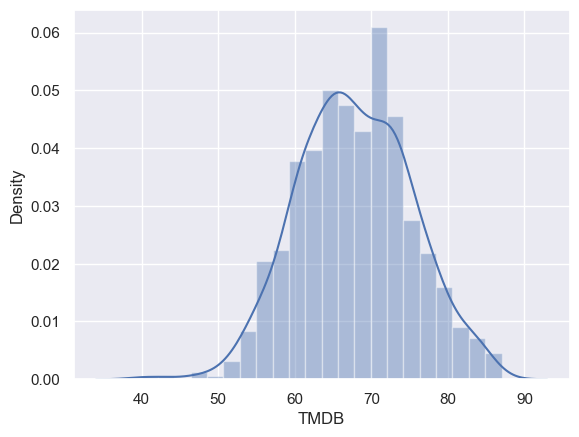

In [86]:
sns.distplot(output2["TMDB"])

In [87]:
q=output2["wordlwide"].quantile(0.99)
data1=output2[output2["wordlwide"]<q]
data1.describe()

,TMDB,wordlwide,Budget,Fouractors,OneActor,Threeactors,Twoactors,GenreCluster
count,722.000000,7.220000e+02,7.220000e+02,722.000000,722.000000,722.000000,722.000000,722.000000
mean,67.760388,4.074449e+08,9.658141e+07,0.013850,0.344875,0.067867,0.209141,1.817175
std,7.404833,2.432949e+08,5.974547e+07,0.116951,0.475657,0.251692,0.406977,1.535465
min,40.000000,4.900000e+01,1.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.250000,2.323373e+08,5.000000e+07,0.000000,0.000000,0.000000,0.000000,0.000000
50%,67.500000,3.239988e+08,8.500000e+07,0.000000,0.000000,0.000000,0.000000,2.000000
75%,73.000000,4.881529e+08,1.400000e+08,0.000000,1.000000,0.000000,0.000000,3.000000
max,87.000000,1.453683e+09,3.170000e+08,1.000000,1.000000,1.000000,1.000000,5.000000


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17178/2831639846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1["wordlwide"])


<Axes: xlabel='wordlwide', ylabel='Density'>

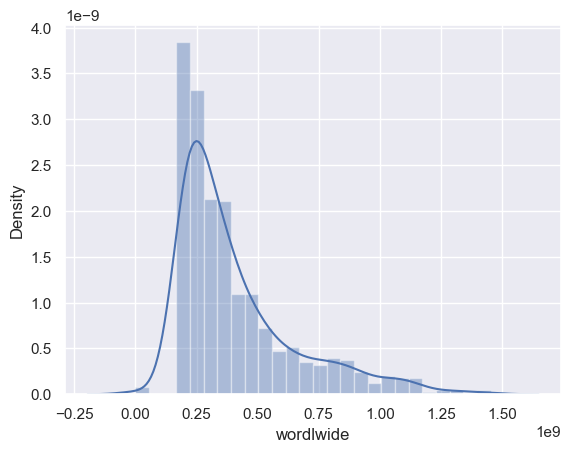

In [88]:
sns.distplot(data1["wordlwide"])

59704079.28589863


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17178/1284477427.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1["Budget"])


<Axes: xlabel='Budget', ylabel='Density'>

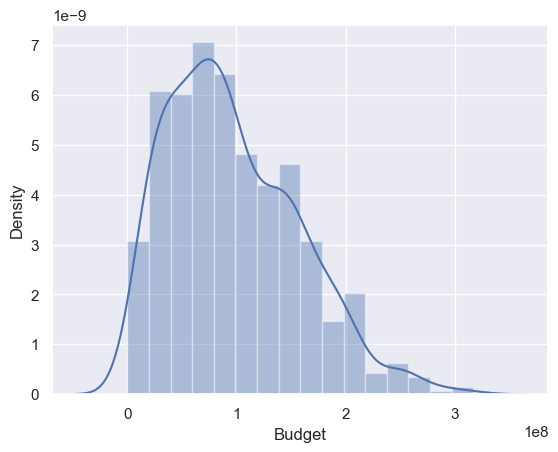

In [89]:
print(np.std(data1["Budget"]))
sns.distplot(data1["Budget"])

In [90]:
data6=data1[data1["wordlwide"]>132218780]
data6

,TMDB,wordlwide,Budget,Fouractors,OneActor,Threeactors,Twoactors,GenreCluster
12,73.0,1453683476,150000000.0,0,0,0,0,2
14,73.0,1405018048,250000000.0,0,0,0,1,1
18,68.0,1334407706,317000000.0,0,0,0,0,1
19,65.0,1310466296,170000000.0,0,0,0,0,1
20,60.0,1284540518,150000000.0,0,0,0,0,2
...,...,...,...,...,...,...,...,...
995,56.0,180630907,60000000.0,0,1,0,0,1
996,64.0,180622424,30000000.0,0,0,0,0,0
997,63.0,180613824,69000000.0,0,1,0,0,0
998,82.0,180563636,40000000.0,0,0,0,0,5


In [91]:
data6=data6.reset_index()

In [92]:
log_profit=np.log(data6["wordlwide"])
data6["Profit Log"]=log_profit
data6

,index,TMDB,wordlwide,Budget,Fouractors,OneActor,Threeactors,Twoactors,GenreCluster,Profit Log
0,12,73.0,1453683476,150000000.0,0,0,0,0,2,21.097367
1,14,73.0,1405018048,250000000.0,0,0,0,1,1,21.063316
2,18,68.0,1334407706,317000000.0,0,0,0,0,1,21.011753
3,19,65.0,1310466296,170000000.0,0,0,0,0,1,20.993649
4,20,60.0,1284540518,150000000.0,0,0,0,0,2,20.973667
...,...,...,...,...,...,...,...,...,...,...
714,995,56.0,180630907,60000000.0,0,1,0,0,1,19.011966
715,996,64.0,180622424,30000000.0,0,0,0,0,0,19.011919
716,997,63.0,180613824,69000000.0,0,1,0,0,0,19.011872
717,998,82.0,180563636,40000000.0,0,0,0,0,5,19.011594


In [93]:
data6=data6.drop(["index","wordlwide"],axis=1)
data6

,TMDB,Budget,Fouractors,OneActor,Threeactors,Twoactors,GenreCluster,Profit Log
0,73.0,150000000.0,0,0,0,0,2,21.097367
1,73.0,250000000.0,0,0,0,1,1,21.063316
2,68.0,317000000.0,0,0,0,0,1,21.011753
3,65.0,170000000.0,0,0,0,0,1,20.993649
4,60.0,150000000.0,0,0,0,0,2,20.973667
...,...,...,...,...,...,...,...,...
714,56.0,60000000.0,0,1,0,0,1,19.011966
715,64.0,30000000.0,0,0,0,0,0,19.011919
716,63.0,69000000.0,0,1,0,0,0,19.011872
717,82.0,40000000.0,0,0,0,0,5,19.011594


In [94]:
VIFSelection=output.copy()
VIFSelection.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Director', 'distributor', 'Time', 'Year',
       'IMDB', 'Tomatometer', 'RottenTomatosAudience', 'TMDB',
       'DomesticPercentage', 'Foreignpercentage', 'DomesticMoney',
       'international', 'wordlwide', 'DomesticOpening', 'Budget', 'Date',
       'MPAA', 'genres', 'linkselection', 'Actors', 'BestActorPresent',
       'Fouractors', 'NOactor', 'OneActor', 'Threeactors', 'Twoactors',
       'GenreCluster'],
      dtype='object')

In [95]:
VIFSelection= VIFSelection.drop(VIFSelection.columns[[0,1,2,3,4,7,8,9,11,12,13,14,16,18,19,20,21,22,23,25]], axis=1)
VIFSelection

,Time,Year,TMDB,wordlwide,Budget,Fouractors,OneActor,Threeactors,Twoactors,GenreCluster
0,162.0,2009,76.0,2923706026,237000000.0,0,0,0,0,1
1,181.0,2019,83.0,2799439100,356000000.0,0,0,0,1,1
2,192.0,2022,77.0,2320250281,NaN,0,0,0,0,1
3,194.0,1997,62.0,2264743305,200000000.0,0,1,0,0,0
4,138.0,2015,73.0,2071310218,245000000.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,92.0,2002,56.0,180630907,60000000.0,0,1,0,0,1
996,108.0,2002,64.0,180622424,30000000.0,0,0,0,0,0
997,100.0,2017,63.0,180613824,69000000.0,0,1,0,0,0
998,139.0,2016,82.0,180563636,40000000.0,0,0,0,0,5


In [96]:
VIFSelection=VIFSelection.dropna()

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=VIFSelection[["Budget","Time","Year","TMDB","Fouractors","OneActor","Threeactors","Twoactors","GenreCluster"]]
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns

In [98]:
vif

,vif,Features
0,4.150791,Budget
1,45.036647,Time
2,99.119344,Year
3,106.027324,TMDB
4,1.104468,Fouractors
5,2.008937,OneActor
6,1.272880,Threeactors
7,1.675001,Twoactors
8,2.460671,GenreCluster


In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=VIFSelection[["Budget","TMDB","Fouractors","OneActor","Threeactors","Twoactors","GenreCluster"]]
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns

In [100]:
vif #There is strong multicollieanirty of Year , IMDB , TMDB . We need to get rid of at least 2 as Rates are insane.

,vif,Features
0,3.425071,Budget
1,5.537536,TMDB
2,1.050460,Fouractors
3,1.982561,OneActor
4,1.219131,Threeactors
5,1.603549,Twoactors
6,2.393379,GenreCluster


# Creating actual Model

In [101]:
data6=data6.drop(["Time","IMDB","Tomatometer","Rotten Tomatos Audience","NOactor"],axis=1)
data6

,TMDB,Budget,Fouractors,OneActor,Threeactors,Twoactors,GenreCluster,Profit Log
0,73.0,150000000.0,0,0,0,0,2,21.097367
1,73.0,250000000.0,0,0,0,1,1,21.063316
2,68.0,317000000.0,0,0,0,0,1,21.011753
3,65.0,170000000.0,0,0,0,0,1,20.993649
4,60.0,150000000.0,0,0,0,0,2,20.973667
...,...,...,...,...,...,...,...,...
714,56.0,60000000.0,0,1,0,0,1,19.011966
715,64.0,30000000.0,0,0,0,0,0,19.011919
716,63.0,69000000.0,0,1,0,0,0,19.011872
717,82.0,40000000.0,0,0,0,0,5,19.011594


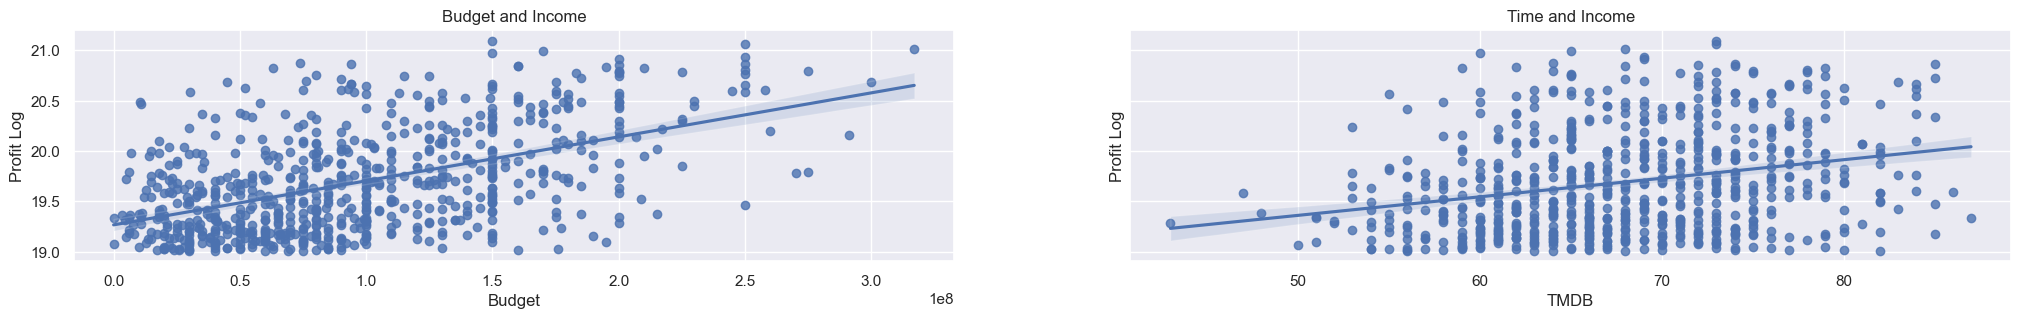

In [102]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(25, 3))

sns.regplot(x="Budget", y="Profit Log", data=data6, ax=ax1)
ax1.set_title("Budget and Income")
ax1.set_xlabel("Budget")

sns.regplot(x="TMDB", y="Profit Log", data=data6, ax=ax2)
ax2.set_title("Time and Income")
ax2.set_xlabel("TMDB")

plt.show()

In [103]:
targets=data6["Profit Log"]
inputs=data6.drop(["Profit Log"],axis=1)

In [104]:
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [105]:
inputsscaled=scaler.transform(inputs)

In [106]:
x_train,x_test,y_train,y_test=train_test_split(inputsscaled,targets,test_size=0.2,random_state=365)

In [107]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [108]:
y_hat=reg.predict(x_train)

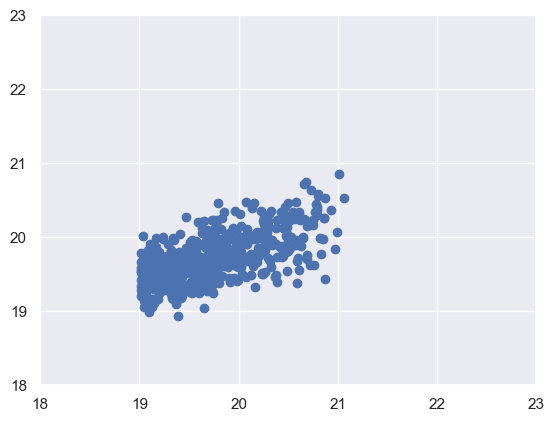

In [109]:
plt.scatter(y_train,y_hat)
plt.xlim(18,23)
plt.ylim(18,23)
plt.show() #We can see model has hardships as profit increases

Text(0.5, 12.44444444444443, 'Residuals')

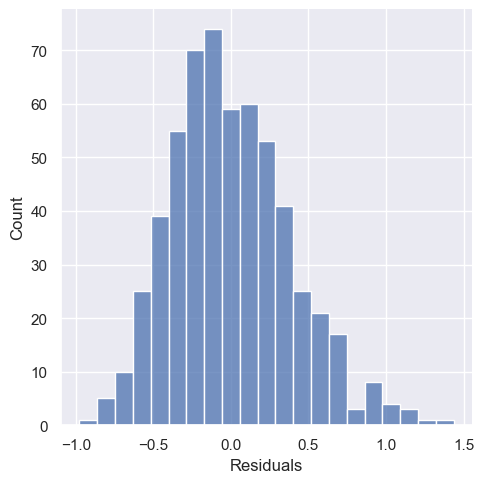

In [110]:
sns.displot(y_train-y_hat) #We have big residuals but it is expected with 0.42 R Square rate on big scale data.
plt.xlabel("Residuals")

In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [123]:
mean_squared_error(y_train,y_hat,squared=False)

0.3847802605051475

In [113]:
len(residuals)

777

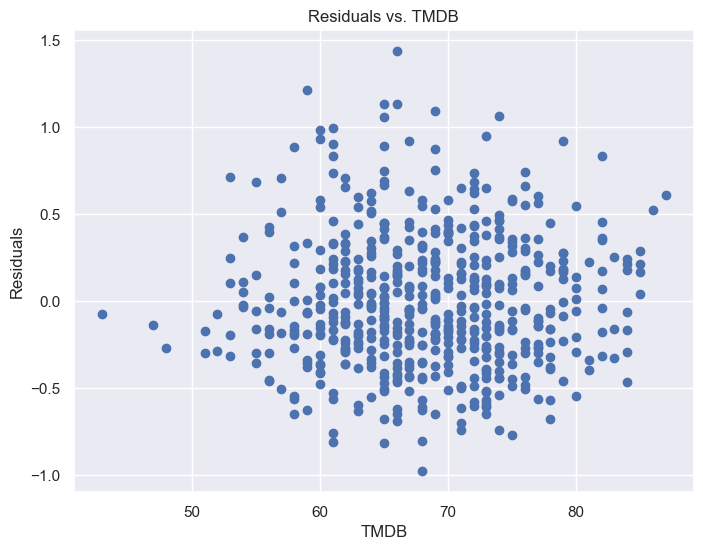

'As we can see there is no significant relationship between our independent variables and residuals, It means No Endogenity and it is a great sign.'

In [114]:
residuals = y_train - y_hat
plt.figure(figsize=(8, 6))
plt.scatter(data6["TMDB"].iloc[:575], residuals)
plt.title("Residuals vs. TMDB")
plt.xlabel("TMDB")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()
"""As we can see there is no significant relationship between our independent variables and residuals, It means No Endogenity and it is a great sign."""

In [115]:
corr = output["TMDB"].corr(residuals)
print(corr)

0.2052627736306217


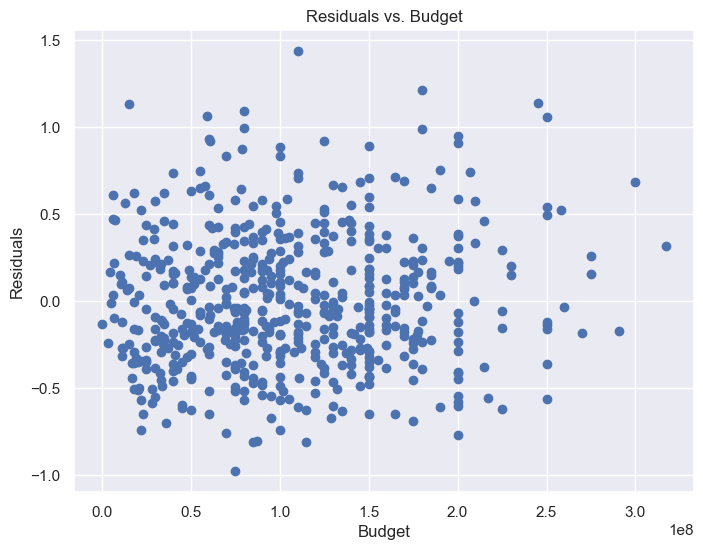

In [116]:
residuals = y_train - y_hat

plt.figure(figsize=(8, 6))
plt.scatter(data6["Budget"].iloc[:575], residuals)
plt.title("Residuals vs. Budget")
plt.xlabel("Budget")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [117]:
reg.score(x_train,y_train)

0.40142435283407074

In [118]:
reg.intercept_

19.693229768435724

In [119]:
reg.coef_

array([ 0.17260673,  0.28594737,  0.00870858, -0.06399131, -0.02752481,
       -0.0490969 , -0.02718328])

In [3760]:
"""No Omitted Variable bias , everything is logical in our model. So there is nothing crucial missing. We are free from another crucial assumption."""

'No Omitted Variable bias , everything is logical in our model. So there is nothing crucial missing. We are free from another crucial assumption.'

In [120]:
regsum=pd.DataFrame(inputs.columns.values,columns=["Features"])
regsum["weights"]=reg.coef_
regsum

,Features,weights
0,TMDB,0.172607
1,Budget,0.285947
2,Fouractors,0.008709
3,OneActor,-0.063991
4,Threeactors,-0.027525
5,Twoactors,-0.049097
6,GenreCluster,-0.027183


In [121]:
y_hat_test=reg.predict(x_test)

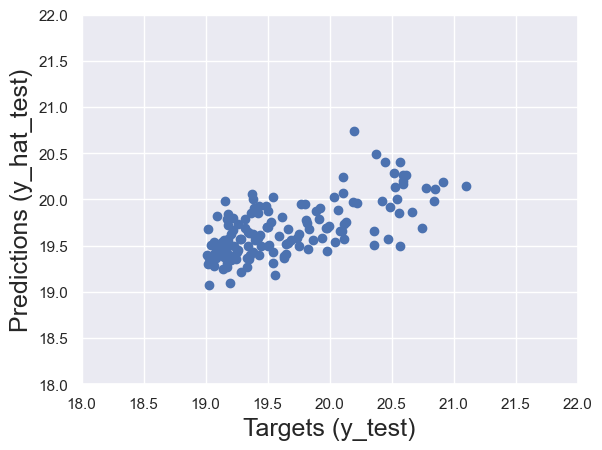

In [122]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(18,22)
plt.ylim(18,22)
plt.show()

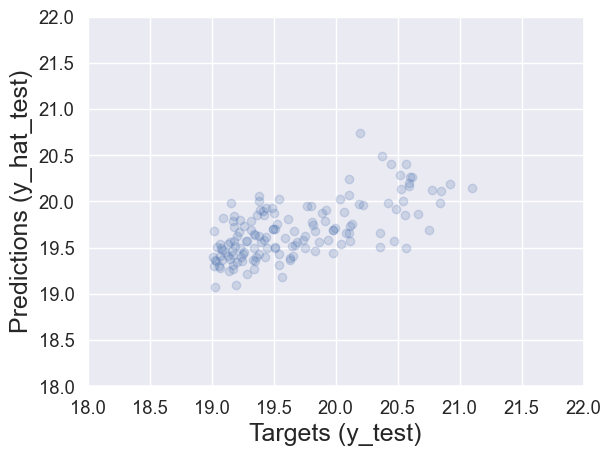

In [3764]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(18,22)
plt.ylim(18,22)
plt.show()

In [3765]:
df_pf=pd.DataFrame(y_hat_test,columns=["Prediction"])
df_pf.head()

,Prediction
0,19.5356714315
1,20.1143975339
2,19.9850491375
3,19.9151784211
4,20.1882406533


In [3766]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=["Prediction"])
df_pf.head()

,Prediction
0,304953978.0382629037
1,543966125.6911393404
2,477965512.1413474083
3,445709708.8830839992
4,585654541.0201071501


In [3767]:
df_pf["Target"]=np.exp(y_test)
df_pf.head()

,Prediction,Target
0,304953978.0382629037,1453683476.0000014305
1,543966125.6911393404,NaN
2,477965512.1413474083,NaN
3,445709708.8830839992,NaN
4,585654541.0201071501,NaN


In [3768]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0   19.0704110349
1   20.8471882069
2   19.1580154557
3   20.4890838684
4   20.9184848668
Name: Profit Log, dtype: float64

In [3769]:
df_pf["Target"]=np.exp(y_test)
df_pf

,Prediction,Target
0,304953978.0382629037,191502425.9999998808
1,543966125.6911393404,1131927995.9999990463
2,477965512.1413474083,209035667.9999999106
3,445709708.8830839992,791217826.0000009537
4,585654541.0201071501,1215577204.9999988079
...,...,...
139,275158723.3601219058,229930770.9999998510
140,361238285.0970363021,293514336.0000002384
141,279420348.5323802829,198636867.9999999404
142,618469642.6630455256,538983207.0000009537


In [3770]:
mean_squared_error(df_pf["Prediction"],df_pf["Target"],squared=False)

207942128.87478128

In [3771]:
mean_absolute_percentage_error(df_pf["Prediction"],df_pf["Target"])

0.3578449546020099

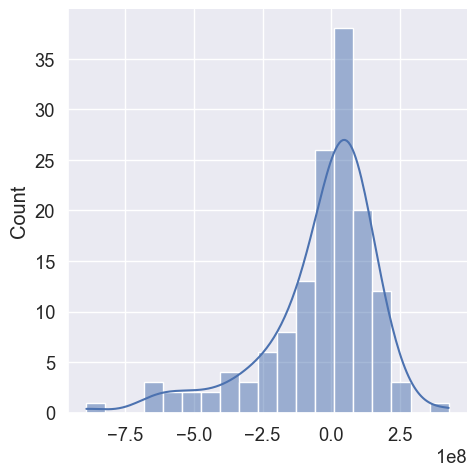

In [3772]:
sns.displot(df_pf["Prediction"]-df_pf["Target"],kde=True)

In [3773]:
df_pf["Residuals"]=df_pf["Target"]-df_pf["Prediction"]

In [3774]:
df_pf["Difference%"]=df_pf["Residuals"]/df_pf["Target"]*100

In [3775]:
df_pf

,Prediction,Target,Residuals,Difference%
0,304953978.0382629037,191502425.9999998808,-113451552.0382630229,-59.2428797943
1,543966125.6911393404,1131927995.9999990463,587961870.3088597059,51.9433985542
2,477965512.1413474083,209035667.9999999106,-268929844.1413475275,-128.6526106833
3,445709708.8830839992,791217826.0000009537,345508117.1169169545,43.6678883821
4,585654541.0201071501,1215577204.9999988079,629922663.9798916578,51.8208684227
...,...,...,...,...
139,275158723.3601219058,229930770.9999998510,-45227952.3601220548,-19.6702477722
140,361238285.0970363021,293514336.0000002384,-67723949.0970360637,-23.0734723285
141,279420348.5323802829,198636867.9999999404,-80783480.5323803425,-40.6689258373
142,618469642.6630455256,538983207.0000009537,-79486435.6630445719,-14.7474790737


In [3779]:
#pd.options.display.float_format = '{:.10f}'.format
pd.set_option('display.max_rows', None) 

In [3777]:
df_pf.describe()

,Prediction,Target,Residuals,Difference%
count,144.0000000000,144.0000000000,144.0000000000,144.0000000000
mean,370051103.6021789908,406011310.0694444180,35960206.4672654718,-9.3226593858
std,127101219.0105922818,256957872.4237587750,205524029.5565874875,40.6043717550
min,191186516.7144956589,180622424.0000001788,-427848520.6391328573,-128.6526106833
25%,282698823.5476964712,223925327.5000001788,-79810696.8803785145,-36.0166279716
50%,337076084.7605512142,295644071.5000002980,-12634330.8595504016,-4.7389314486
75%,427445695.4113837481,503797624.0000003576,111221582.3419219553,22.8992938469
max,1020311336.6391320229,1453683476.0000014305,892388167.4444344044,65.6277213440


In [3780]:
df_pf.sort_values(by="Difference%") #Residuals are so high , But it is the best estimates to bring out from our dataset.

,Prediction,Target,Residuals,Difference%
2,477965512.1413474083,209035667.9999999106,-268929844.1413475275,-128.6526106833
87,403620969.9927791357,196393745.0000002384,-207227224.9927788973,-105.5162041911
113,513982890.5359264612,260502115.0000000298,-253480775.5359264314,-97.3046900352
17,353843438.3939191103,181674817.0000000894,-172168621.3939190209,-94.7674665300
60,415702936.3863109946,213719941.9999996424,-201982994.3863113523,-94.5082580952
70,489163311.9187327027,261119291.9999997318,-228044019.9187329710,-87.3332713842
132,391698820.6945279241,211787510.9999999106,-179911309.6945280135,-84.9489702415
29,395165992.8249177337,223664607.9999997914,-171501384.8249179423,-76.6779269901
131,368808194.2953810692,213216215.9999996424,-155591978.2953814268,-72.9738015308
81,1020311336.6391320229,592462815.9999991655,-427848520.6391328573,-72.2152528538


In [2929]:
data6 # The DataFrame we preprocessed & built model on 

,TMDB,Budget,Fouractors,OneActor,Threeactors,Twoactors,Middle,Weak,Profit Log
8,74.0,250000000.0,0,1,0,0,0,0,20.867406
9,85.0,94000000.0,1,0,0,0,0,0,20.861285
10,72.0,200000000.0,0,0,0,1,0,0,20.856460
11,74.0,160000000.0,0,0,0,1,0,0,20.847188
12,68.0,160000000.0,0,0,0,1,0,0,20.846736
...,...,...,...,...,...,...,...,...,...
714,56.0,60000000.0,0,1,0,0,0,0,19.011966
715,64.0,30000000.0,0,0,0,0,1,0,19.011919
716,63.0,69000000.0,0,1,0,0,1,0,19.011872
717,82.0,40000000.0,0,0,0,0,1,0,19.011594


# End of Analysis